# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_url = btc_url + "?format+json"
btc_data = requests.get(btc_url)
btc_content = btc_data.content
print (btc_content)

# Fetch current ETH price
# YOUR CODE HERE!
eth_url = eth_url + "?format+json"
eth_data = requests.get(eth_url)
eth_content = eth_data.content
print (eth_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18736043,\n\t\t\t"total_supply": 18736043,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 40009.0000000000000000,\n\t\t\t\t\t"volume_24h": 34937888915,\n\t\t\t\t\t"market_cap": 748676460512,\n\t\t\t\t\t"percentage_change_1h": -0.6329619700466040,\n\t\t\t\t\t"percentage_change_24h": -1.3622591364425600,\n\t\t\t\t\t"percentage_change_7d": 19.2259339518875000,\n\t\t\t\t\t"percent_change_1h": -0.6329619700466040,\n\t\t\t\t\t"percent_change_24h": -1.3622591364425600,\n\t\t\t\t\t"percent_change_7d": 19.2259339518875000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1623814192\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1623814192,\n\t\t"num_cryptocurrencies": 1288,\n\t\t"error": null\n\t}\n}'
b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"

In [6]:
import json
btc_json =btc_data.json()

print(json.dumps(btc_json,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18736043,
            "total_supply": 18736043,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 40009.0,
                    "volume_24h": 34937888915,
                    "market_cap": 748676460512,
                    "percentage_change_1h": -0.632961970046604,
                    "percentage_change_24h": -1.36225913644256,
                    "percentage_change_7d": 19.2259339518875,
                    "percent_change_1h": -0.632961970046604,
                    "percent_change_24h": -1.36225913644256,
                    "percent_change_7d": 19.2259339518875
                }
            },
            "last_updated": 1623814192
        }
    },
    "metadata": {
        "timestamp": 1623814192,
        "num_cry

In [7]:
eth_json = eth_data.json()
print(json.dumps(eth_json,indent =4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 116309180,
            "total_supply": 116309180,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2526.05,
                    "volume_24h": 25503498334,
                    "market_cap": 293124281200,
                    "percentage_change_1h": -0.356323617679856,
                    "percentage_change_24h": -2.56254827900425,
                    "percentage_change_7d": -0.0778555982895582,
                    "percent_change_1h": -0.356323617679856,
                    "percent_change_24h": -2.56254827900425,
                    "percent_change_7d": -0.0778555982895582
                }
            },
            "last_updated": 1623814195
        }
    },
    "metadata": {
        "timestamp": 1623814195,
       

In [8]:
btc_price = btc_json['data']['1']['quotes']['USD']['price']
print (btc_price)

40009.0


In [9]:
eth_price = eth_json['data']['1027']['quotes']['USD']['price']
print (eth_price)

2526.05


In [10]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48010.80
The current value of your 5.3 ETH is $13388.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

type(alpaca_api_key)
type(alpaca_secret_key)

str

In [13]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [14]:
# Format current date as ISO format
start_date =pd.Timestamp('2020-05-01', tz ="America/New_York").isoformat()
end_date =pd.Timestamp('2025-05-01', tz ="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [15]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio =alpaca.get_barset(
    tickers,
    timeframe, 
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-05-01 00:00:00-04:00  285.31  290.6572  281.5200  282.73  222309009  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.1300  283.66  140118601  
2020-05-05 00:00:00-04:00  286.64  289.2500  283.7134  286.22  144288798  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.8700  284.29  130709942  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.1300  287.70  137510572

In [16]:
# Pick AGG and SPY close prices
df_closing_price = pd.DataFrame()
df_closing_price["AGG"] = df_portfolio["AGG"]["close"]
df_closing_price["SPY"] = df_portfolio["SPY"]["close"]
df_closing_price.index = df_closing_price.index.date
df_closing_price.head()

,AGG,SPY
2020-05-01,116.900,282.73
2020-05-04,116.975,283.66
2020-05-05,116.880,286.22
2020-05-06,116.450,284.29
2020-05-07,116.730,287.70


In [17]:
agg_close_price = df_closing_price['AGG'].iloc[-1]
spy_close_price = df_closing_price['SPY'].iloc[-1]

In [18]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.995
Current SPY closing price: $424.5


In [19]:
# Compute the current value of shares
my_spy = 50
my_spy_value = my_spy * spy_close_price
my_agg = 200
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21225.00
The current value of your 200 AGG shares is $22999.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value

In [21]:
# Create savings DataFrame
df_savings = pd.DataFrame(
    {"amount":[total_crypto,total_shares]}
, index = ['crypto','shares'])
display(df_savings)

,amount
crypto,61398.865
shares,44224.000


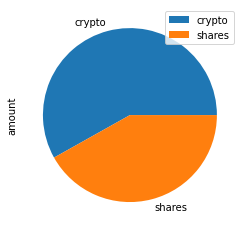

In [22]:
# Plot savings pie chart
plot = df_savings.plot.pie (y = "amount")

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

In [24]:
# Validate saving health
total_savings > emergency_fund

if total_savings > emergency_fund:
    print('Congratulations! You have exceeded your goal')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your goal')
else:
    print(f'You need ${emergency_fund - total_savings} to reach your goal')

    

Congratulations! You have exceeded your goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [25]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [26]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data =alpaca.get_barset(
    tickers,
    timeframe, 
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
                            portfolio_data = df_stock_data,
weights = [.40,.60],
num_simulation = 500,
num_trading_days =252*30
)

In [28]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997593,0.997319,1.014078,0.993481,1.004188,1.011006,0.996056,1.006045,1.001501,1.005885,...,0.992290,0.999950,0.992655,1.001736,0.987743,0.996334,0.980935,1.003439,1.012534,1.004273
2,0.999227,1.004261,1.022429,0.994569,0.999613,1.005862,0.987784,1.004936,0.997214,1.005547,...,0.986291,1.004650,0.994049,1.004344,0.989903,0.985224,0.967995,1.000566,1.008589,1.015135
3,0.994369,1.006092,1.014581,0.991401,0.994050,1.005206,0.993334,1.007044,0.994593,1.014014,...,0.994223,1.002736,0.998605,1.005243,0.980920,0.987207,0.963229,0.995037,1.011275,1.014612
4,0.991805,1.007938,1.012398,1.005378,0.985608,0.999753,0.998016,1.013288,0.982205,1.027295,...,0.993353,0.998944,1.003758,0.990042,0.992303,0.987429,0.967964,0.992671,1.009280,1.018084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,26.349265,37.970830,16.660992,34.458670,5.998266,11.036407,18.969637,34.740216,6.734210,8.225120,...,5.298318,6.239818,59.679828,9.118396,7.857615,11.527033,23.320240,10.557592,17.210176,16.796261
7557,26.599999,38.051868,16.531675,35.061205,5.932552,10.924005,18.750827,34.948357,6.808353,8.238070,...,5.270864,6.177265,59.997621,9.256076,8.002168,11.474294,23.381619,10.647032,17.244310,16.549315
7558,26.584716,38.092869,16.845373,34.662307,5.932731,10.824697,18.748716,35.379136,6.857454,8.209553,...,5.268687,6.136881,60.762962,9.070381,8.005545,11.527260,23.230771,10.741361,17.148740,16.544192
7559,26.703109,38.080505,16.807160,34.773543,5.875247,10.759237,18.762200,36.011917,6.885346,8.269730,...,5.240803,6.171352,60.237449,9.008398,8.056320,11.453440,23.132746,10.694094,17.138859,16.589066


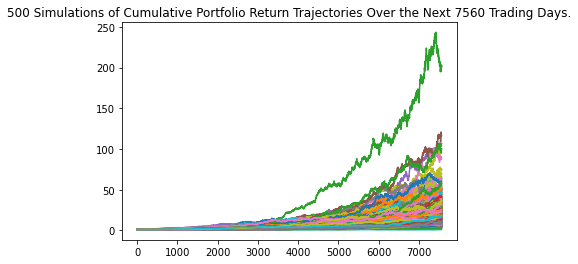

In [29]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

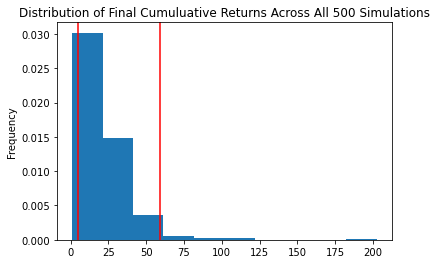

In [30]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()
print (tbl)

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean             21.719702
std              17.319076
min               0.988675
25%              11.047804
50%              17.101569
75%              27.026622
max             202.409101
95% CI Lower      5.152654
95% CI Upper     59.019996
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round (tbl[8]*initial_investment,2)
ci_upper = round (tbl[9]*initial_investment, 2)

In [33]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $103053.09 and $1180399.93


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round (tbl[8]*initial_investment,2)
ci_upper = round (tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $154579.63 and $1770599.89


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
                            portfolio_data = df_stock_data,
weights = [.60,.40],
num_simulation = 500,
num_trading_days =252*5
)

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.portfolio_data.head()
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994462,1.007492,0.997870,0.999971,1.004286,0.991502,1.000413,1.000321,0.994815,0.995319,...,0.997325,0.991818,1.000606,0.994858,0.992479,1.009800,0.996074,0.998183,0.993592,0.996841
2,0.991436,1.008439,1.004943,1.007463,1.010414,0.992416,1.003808,0.994737,0.991767,0.979817,...,1.001588,1.001094,0.996092,1.003917,0.990548,1.009244,0.997516,1.005278,0.984550,0.997178
3,0.984992,1.017404,1.011650,1.004889,1.008292,0.993056,1.003199,0.995296,0.999769,0.974875,...,1.009201,1.008668,0.994009,1.002406,0.996183,0.999223,0.998174,0.995860,0.982829,1.005485
4,0.987972,1.009630,1.013080,0.999718,1.002902,0.987815,1.006396,0.996258,1.003174,0.976822,...,1.007702,1.013371,0.998537,1.000435,0.992931,0.998373,0.997607,0.995424,0.984624,1.006375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.562619,1.907401,1.382919,1.689026,1.589333,1.309734,1.690199,1.324406,1.189207,1.381058,...,0.918613,2.044574,1.720783,1.664692,1.163933,1.464453,1.652658,1.268924,1.143329,1.449743
1257,1.551061,1.891863,1.360119,1.697654,1.588451,1.310376,1.700493,1.324868,1.195918,1.374838,...,0.914935,2.039254,1.707212,1.672526,1.168348,1.461504,1.650918,1.273085,1.158143,1.442196
1258,1.560931,1.887603,1.352106,1.701501,1.577781,1.314626,1.704925,1.325508,1.197560,1.383172,...,0.917244,2.027660,1.715921,1.667283,1.179255,1.465909,1.643632,1.270608,1.150601,1.424845
1259,1.553589,1.892553,1.346558,1.688846,1.572462,1.329545,1.706930,1.322442,1.193912,1.396671,...,0.920809,2.025012,1.716654,1.679668,1.175007,1.458022,1.640032,1.273881,1.146744,1.410907


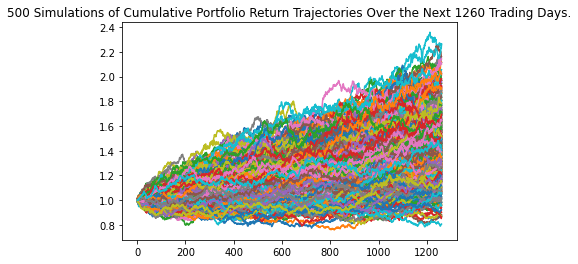

In [37]:
# Plot simulation outcomes
line_plot_fiveyear = MC_five_year.plot_simulation()

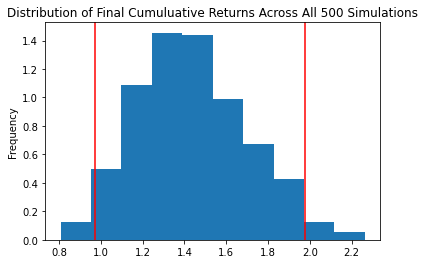

In [38]:
# Plot probability distribution and confidence intervals
dist_plot_fiveyear = MC_five_year.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five_year = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five_year)

count           500.000000
mean              1.435590
std               0.263875
min               0.806603
25%               1.248250
50%               1.418430
75%               1.604635
max               2.263382
95% CI Lower      0.973139
95% CI Upper      1.976852
Name: 1260, dtype: float64


In [40]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round (tbl_five_year[8]*initial_investment_five,2)
ci_upper_five = round (tbl_five_year[9]*initial_investment_five, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58388.34 and $118611.11


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
                            portfolio_data = df_stock_data,
weights = [.60,.40],
num_simulation = 500,
num_trading_days =252*10
)

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.portfolio_data.head()
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010160,0.990875,1.006286,0.997015,0.993884,0.997832,0.994174,0.999375,0.999281,0.993501,...,1.000386,0.995244,0.992464,1.007864,1.001429,1.010680,1.007217,1.000714,1.004247,0.991728
2,1.005592,0.981769,0.999371,0.990511,0.991028,0.992194,0.999989,1.002517,0.994856,0.989580,...,0.997239,0.991039,0.999673,1.011429,0.998857,1.015418,1.017249,0.999171,1.007993,0.986635
3,1.016752,0.985936,1.007686,0.996160,0.987533,0.986164,0.997985,1.003711,0.998533,0.989964,...,0.992709,0.985358,0.999142,1.012716,0.998461,1.019462,1.017177,0.994103,1.010135,0.983705
4,1.018161,0.982135,1.005830,1.004863,0.987424,0.986703,0.998598,0.995950,1.003655,0.983371,...,0.992830,0.982707,0.987799,1.012138,1.004059,1.020206,1.022342,0.988387,1.005740,0.985512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.150262,3.445809,2.984736,2.383441,1.490619,1.857080,1.923829,2.115509,1.766143,1.946017,...,2.386636,2.454502,2.449084,1.812706,2.174336,2.999753,2.251877,2.596791,2.352171,2.822454
2517,2.133689,3.452067,2.989855,2.381802,1.501165,1.856823,1.913507,2.127561,1.783697,1.935396,...,2.412213,2.462101,2.430475,1.806923,2.195104,2.994752,2.273557,2.584238,2.358929,2.813473
2518,2.111434,3.450146,3.007632,2.380646,1.501880,1.852503,1.916818,2.129476,1.772081,1.934830,...,2.393556,2.443434,2.418363,1.815756,2.173042,2.978902,2.289840,2.595886,2.357975,2.811876
2519,2.114872,3.459785,3.007572,2.382658,1.510129,1.850871,1.919371,2.130463,1.770891,1.938220,...,2.385235,2.446065,2.438174,1.817115,2.175281,2.989863,2.292373,2.623596,2.353176,2.810252


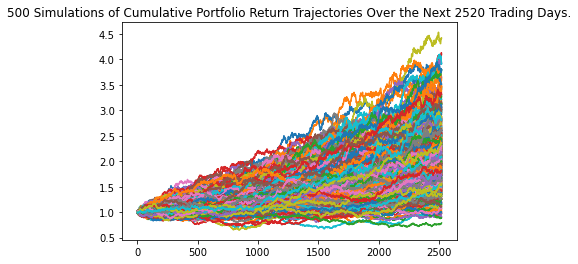

In [43]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

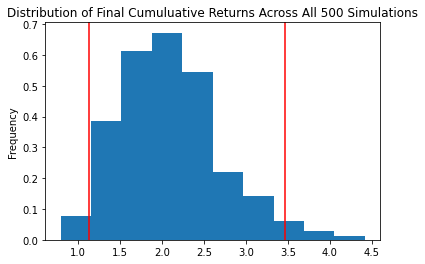

In [44]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()
print(tbl_ten)

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              2.089676
std               0.592700
min               0.788053
25%               1.651350
50%               2.063523
75%               2.420611
max               4.415988
95% CI Lower      1.126812
95% CI Upper      3.463047
Name: 2520, dtype: float64


In [46]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round (tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round (tbl_ten[9]*initial_investment_ten, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $67608.72 and $207782.79
